In [ ]:
import numpy as np 
import matplotlib.pyplot as plt


In [5]:
def plot_two_d_vector_field(
    dynamics_fn, axs, min_xy=-3, max_xy=3, n_pts=100
):
    x = np.linspace(min_xy, max_xy, n_pts)
    y = np.linspace(min_xy, max_xy, n_pts)
    X, Y = np.meshgrid(x, y)

    XY = np.zeros((X.shape[0] ** 2, 2))
    XY[:, 0] = X.flatten()
    XY[:, 1] = Y.flatten()
    XY_out = dynamics_fn(XY)
    s = XY_out - XY
    u = s[:, 0].reshape(X.shape[0], X.shape[1])
    v = s[:, 1].reshape(Y.shape[0], Y.shape[1])

    axs.streamplot(X, Y, u, v, color="black", linewidth=0.5, arrowsize=0.5)

In [102]:
def dynamics_factory(w=None, power=1):
    if w is None:
        w = np.eye(2)
    def f(x):
        r = np.sqrt(np.sum((x @ w) * x, axis=-1))
        return x * (1 - np.power(r, power))[..., None]

    return f

f = dynamics_factory(w = np.array([[1, 0], [0, 2]]))

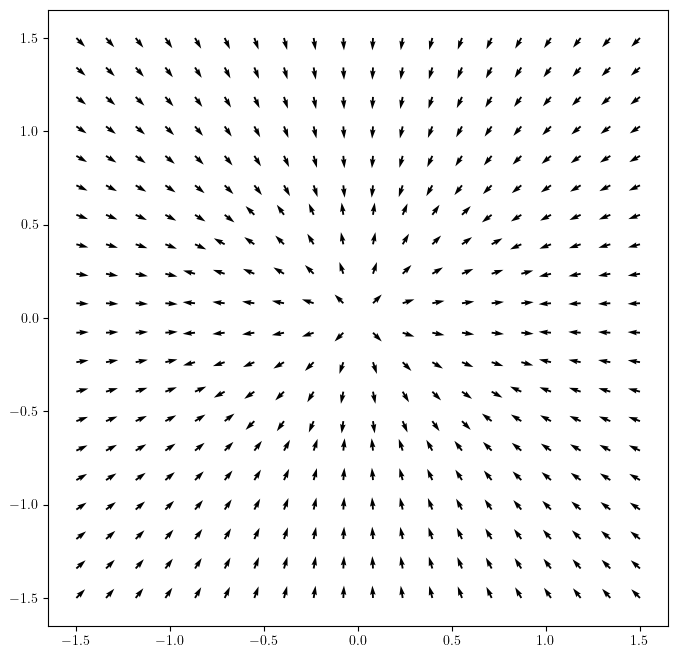

In [108]:
fig, ax = plt.subplots(figsize=(8, 8))
min_xy = -1.5
max_xy = 1.5
n_pts = 20
x = np.linspace(min_xy, max_xy, n_pts)
y = np.linspace(min_xy, max_xy, n_pts)
X, Y = np.meshgrid(x, y)
XY = np.zeros((X.shape[0] ** 2, 2))
XY[:, 0] = X.flatten()
XY[:, 1] = Y.flatten()
XY_out = f(XY)
s = XY_out
u = s[:, 0].reshape(X.shape[0], X.shape[1])
v = s[:, 1].reshape(Y.shape[0], Y.shape[1])
magnitude = np.sqrt(u**2 + v**2)
u_norm = u / magnitude
v_norm = v / magnitude
# fix arrow length
ax.quiver(X, Y, u_norm, v_norm, scale=50)

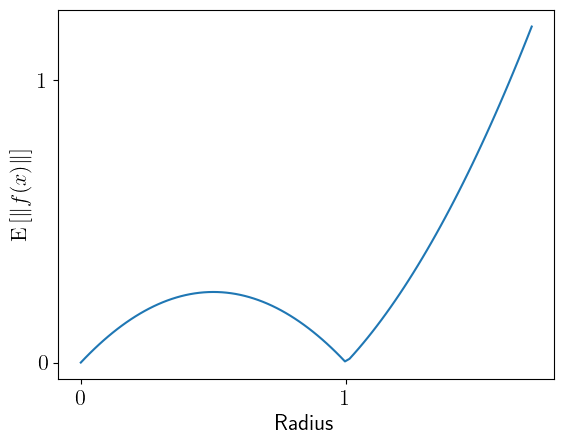

In [101]:
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl
mpl.rcParams["text.usetex"] = True

#plot average vector field norm for each concentric circle
radii = np.linspace(0, 1.7, 100)
angles = np.linspace(0, 2 * np.pi, 100)
R, A = np.meshgrid(radii, angles)
X = R * np.cos(A)
Y = R * np.sin(A)
Z = f(np.stack([X, Y], axis=-1))
#average per radius
avg_norm = np.mean(np.linalg.norm(Z, axis=-1), axis=0)
fig, ax = plt.subplots()
ax.plot(radii, avg_norm)

ax.set_xlabel('Radius', fontsize=16)
ax.set_ylabel(r'$\mathrm{E}\left[\|f(x)\|\right]$', fontsize=16)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
# set ticks font size
ax.tick_params(axis='both', which='major', labelsize=16)
#ax.set_title('Average Vector Field Norm for Each Concentric Circle')